In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## EBIC 

In [2]:
q = 1.6E-19 #C
Ib = 1E-3
Eb = 2
eta = 1
Ei = 0.01

G0 = Ib*Eb*eta/q/Ei

In [3]:
def Ic(Eb, tm, W, L):
    """Returns Collection efficiency value for given:
    
    Eb – electron beam energy
    tm – metal thickness
    W  – screen charge region thickness
    L  – Diffusion length 
    
    """
    from scipy.integrate import quad
    
    def A(z, Eb):
        R = 7.34*Eb**(1.75)#nm, Eb in keV
        return np.piecewise(z, 
                            [z < 0.22*R, z >= 0.22*R],
                            [lambda z: 12.86, lambda z: 3.97])

    def h(z, Eb):
        R = 7.34*Eb**(1.75)#nm, Eb in keV
        return 1.603/R*np.exp(-A(z, Eb)*(z/R - 0.22)**2)
    
    def hexp(z, Eb):
        R = 7.34*Eb**(1.75)#nm, Eb in keV
        return 1.603/R*np.exp(-A(z, Eb)*(z/R - 0.22)**2)*np.exp(-(z-W)/L)

    
    I1 = np.asarray([quad(h,    tm,      W, args=(_Eb))[0] for _Eb in Eb])
    I2 = np.asarray([quad(hexp, tm, np.inf, args=(_Eb))[0] for _Eb in Eb])
    I = q*G0*(I1 + I2)
    I = I/max(I)
    return I

## Plot data

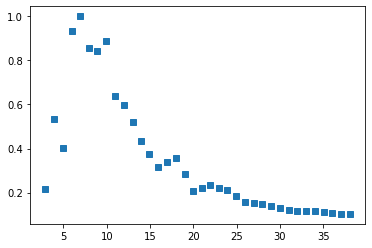

In [4]:
path = 'data/S1.csv'
csv = np.loadtxt(path, delimiter = ',')
E_data = csv[:,0]
I_data = csv[:,1]/max(csv[:,1])
fig = plt.figure()
plt.plot(E_data, I_data, 's')

## Fit data

optimal =  [ 50.27055324 747.68455212 111.04009714]


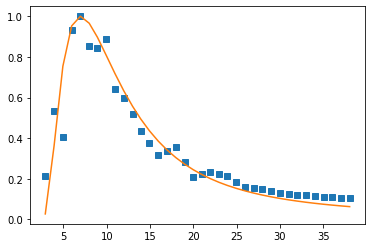

In [5]:
from scipy.optimize import curve_fit
E = E_data
X = 7.34*E**(1.75)
guess = [44, 1000, 160]

parameter_optimal, cov = curve_fit(Ic, E_data, I_data, guess) 
print('optimal = ', parameter_optimal)


fig = plt.figure()
plt.plot(E, I_data, 's')
plt.plot(E, Ic(E, *parameter_optimal))